In [12]:
# Enhanced Comparison Analysis - Checkout Visits, Pop-up Modal, and Purchase Events
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

# Load the CSV file
colors = ['salmon', '#F899F3', '#73FABD', '#6ED1F8','#E0F26D',  '#106ED3', '#6ED1F8']

df = pd.read_csv('analytics.csv')

## Session Distribution Analysis

Let's analyze how sessions are distributed among users to identify if certain users contribute disproportionately to the overall session count.

In [13]:
# Clean the data and filter relevant entries
# Remove entries without user_id or with placeholder user_ids
df_filtered = df[(df['user_id'] != 'none') & (df['user_id'] != 'less-website')].copy()

# Check the shape of filtered data
print(f"Total entries in original dataset: {df.shape[0]}")
print(f"Entries with valid user_ids: {df_filtered.shape[0]}")
print(f"Percentage of data retained: {df_filtered.shape[0]/df.shape[0]*100:.2f}%")

Total entries in original dataset: 14749
Entries with valid user_ids: 14285
Percentage of data retained: 96.85%


In [14]:
# Count the number of unique sessions per user
user_session_counts = df_filtered.groupby('user_id')['session_id'].nunique().sort_values(ascending=False)

# Basic statistics about sessions per user
print(f"Total number of unique users: {len(user_session_counts)}")
print(f"Total number of sessions: {user_session_counts.sum()}")
print(f"\nSession distribution statistics:")
print(f"Mean sessions per user: {user_session_counts.mean():.2f}")
print(f"Median sessions per user: {user_session_counts.median():.2f}")
print(f"Min sessions per user: {user_session_counts.min()}")
print(f"Max sessions per user: {user_session_counts.max()}")

# Display top 10 users by session count
print("\nTop 10 users by session count:")
display(user_session_counts.head(10))

Total number of unique users: 65
Total number of sessions: 258

Session distribution statistics:
Mean sessions per user: 3.97
Median sessions per user: 1.00
Min sessions per user: 1
Max sessions per user: 28

Top 10 users by session count:


user_id
42a0286f-f933-490a-89aa-0c0037dae11e    28
390c0190-33a3-4029-ae09-687bff0b77d6    27
ddb693bf-df31-4881-a0de-5cca527b0504    23
73af51b2-2044-40d1-997f-4872caf25fed    22
05d00887-5f39-4c88-8457-3da20a77b761    19
a584c10c-d236-408a-b544-50b6219dee39    14
c840702c-e454-47b5-8ef5-60ef2a7df99e    13
e2eb1291-5fec-45e6-bded-3018f0d67d66    10
0923b647-997c-466d-b7ce-3ae6246ce5d7     8
0b7cd927-52ef-434b-8b2e-9c63281c6327     6
Name: session_id, dtype: int64

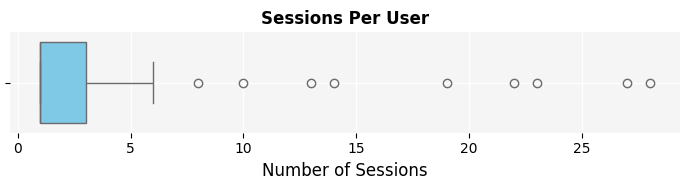

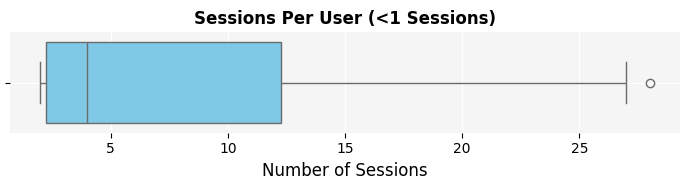

In [ ]:

# Create a boxplot to highlight outliers
plt.figure(figsize=(7, 2))
sns.boxplot(x=user_session_counts, color=colors[3])
plt.title('Sessions Per User', fontweight='bold')
plt.xlabel('Number of Sessions', fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.grid(color='white', linewidth=1, axis='y', alpha=1, zorder=1)
ax.grid(color='white', linewidth=1, axis='x', alpha=1, zorder=1)
ax.set_facecolor('#F5F5F5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add annotations for min, median, and max values
min_val = user_session_counts.min()
median_val = user_session_counts.median()
max_val = user_session_counts.max()


plt.tight_layout()
plt.savefig('plots/boxplot_sessions_per_user.png', dpi=300, bbox_inches='tight')
plt.show()

# Filter user_session_counts to include only users with more than 1 session
user_session_counts_above_1 = user_session_counts[user_session_counts > 1]

# Create a boxplot to highlight outliers
plt.figure(figsize=(7, 2))
sns.boxplot(x=user_session_counts_above_1, color=colors[3])
plt.title('Sessions Per User (<1 Sessions)', fontweight='bold')
plt.xlabel('Number of Sessions', fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.grid(color='white', linewidth=1, axis='y', alpha=1, zorder=1)
ax.grid(color='white', linewidth=1, axis='x', alpha=1, zorder=1)
ax.set_facecolor('#F5F5F5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add annotations for min, median, and max values
min_val = user_session_counts_above_1.min()
median_val = user_session_counts_above_1.median()
max_val = user_session_counts_above_1.max()

plt.tight_layout()
plt.savefig('plots/boxplot_sessions_per_user1+.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Calculate the cumulative contribution to total sessions
total_sessions = user_session_counts.sum()
user_contribution = user_session_counts.copy()
user_contribution_percent = (user_contribution / total_sessions * 100).sort_values(ascending=False)
user_contribution_cumsum = user_contribution_percent.cumsum()

# Find what percentage of users account for 50% and 80% of all sessions
users_for_50_percent = len(user_contribution_cumsum[user_contribution_cumsum <= 50])
users_for_80_percent = len(user_contribution_cumsum[user_contribution_cumsum <= 80])

print(f"Top {users_for_50_percent} users ({users_for_50_percent/len(user_contribution_cumsum)*100:.2f}% of users) account for 50% of all sessions")
print(f"Top {users_for_80_percent} users ({users_for_80_percent/len(user_contribution_cumsum)*100:.2f}% of users) account for 80% of all sessions")

Top 5 users (7.69% of users) account for 50% of all sessions
Top 19 users (29.23% of users) account for 80% of all sessions


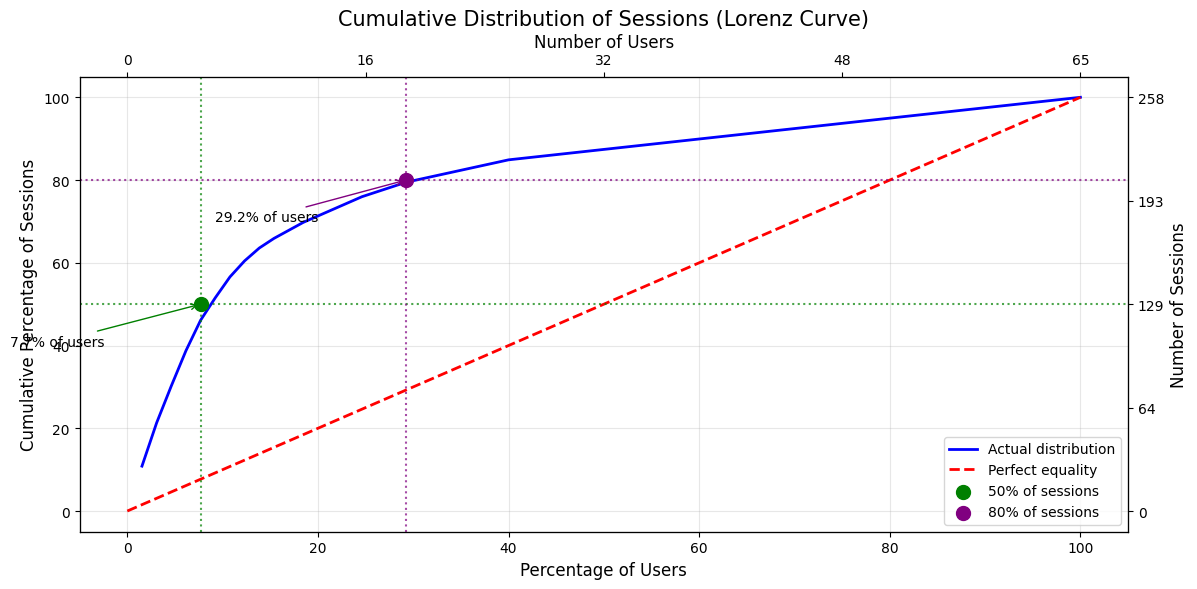

In [17]:
# Visualize the cumulative contribution of users to total sessions
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative percentage of sessions vs percentage of users
total_users = len(user_contribution_cumsum)
percent_users = np.arange(1, total_users + 1) / total_users * 100

# Lorenz curve
ax.plot(percent_users, user_contribution_cumsum.values, 'b-', linewidth=2, label='Actual distribution')

# Perfect equality line (if all users had equal sessions)
ax.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect equality')

# Add markers at 50% and 80% of sessions
fifty_percent_users = percent_users[users_for_50_percent-1] if users_for_50_percent > 0 else 0
eighty_percent_users = percent_users[users_for_80_percent-1] if users_for_80_percent > 0 else 0

ax.scatter([fifty_percent_users], [50], color='green', s=100, zorder=5, label='50% of sessions')
ax.scatter([eighty_percent_users], [80], color='purple', s=100, zorder=5, label='80% of sessions')

# Add horizontal and vertical lines
ax.axhline(y=50, color='green', linestyle=':', alpha=0.7)
ax.axhline(y=80, color='purple', linestyle=':', alpha=0.7)
ax.axvline(x=fifty_percent_users, color='green', linestyle=':', alpha=0.7)
ax.axvline(x=eighty_percent_users, color='purple', linestyle=':', alpha=0.7)

# Add annotations
ax.annotate(f'{fifty_percent_users:.1f}% of users',
           (fifty_percent_users, 50),
           xytext=(fifty_percent_users-20, 40),
           arrowprops=dict(arrowstyle='->', color='green'))

ax.annotate(f'{eighty_percent_users:.1f}% of users',
           (eighty_percent_users, 80),
           xytext=(eighty_percent_users-20, 70),
           arrowprops=dict(arrowstyle='->', color='purple'))

# Add grid, labels, and title
ax.grid(True, alpha=0.3)
ax.set_title('Cumulative Distribution of Sessions (Lorenz Curve)', fontsize=15)
ax.set_xlabel('Percentage of Users', fontsize=12)
ax.set_ylabel('Cumulative Percentage of Sessions', fontsize=12)
ax.legend(loc='best')
# Calculate the absolute number of sessions and users for better interpretation
total_sessions_count = user_contribution.sum()
cumulative_sessions = (user_contribution.sort_values(ascending=False).cumsum())

# Create a second x-axis for absolute user count
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([0, 25, 50, 75, 100])
ax2.set_xticklabels([0, int(total_users*0.25), int(total_users*0.5), int(total_users*0.75), total_users])
ax2.set_xlabel('Number of Users', fontsize=12)

# Create a second y-axis for absolute session count
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.set_yticks([0, 25, 50, 75, 100])
ax3.set_yticklabels([0, int(total_sessions_count*0.25), int(total_sessions_count*0.5), 
                     int(total_sessions_count*0.75), int(total_sessions_count)])
ax3.set_ylabel('Number of Sessions', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
# Calculate the Gini coefficient to measure inequality in session distribution
def gini_coefficient(x):
    # Based on the Lorenz curve and area calculation
    x = np.sort(x)
    n = len(x)
    cum_values = np.cumsum(x)
    # Formula: G = 1 - (2/n) * sum_{i=1}^{n} [(n+1-i)/n * x_i / sum(x)]
    indices = np.arange(1, n+1)
    return 1 - 2 * np.sum((n + 1 - indices) * x) / (n * np.sum(x))

# Calculate Gini coefficient for our session distribution
gini_value = gini_coefficient(user_session_counts.values)

print(f"Gini coefficient for session distribution: {gini_value:.4f}")
print("Interpretation:")
print("- 0 would mean perfect equality (all users have the same number of sessions)")
print("- 1 would mean perfect inequality (one user has all sessions)")
if gini_value < 0.2:
    print("- This indicates a very equal distribution of sessions among users")
elif gini_value < 0.4:
    print("- This indicates a relatively equal distribution of sessions among users")
elif gini_value < 0.6:
    print("- This indicates a moderate inequality in session distribution")
elif gini_value < 0.8:
    print("- This indicates significant inequality in session distribution")
else:
    print("- This indicates extreme inequality in session distribution")

Gini coefficient for session distribution: 0.6010
Interpretation:
- 0 would mean perfect equality (all users have the same number of sessions)
- 1 would mean perfect inequality (one user has all sessions)
- This indicates significant inequality in session distribution


## Summary of Session Distribution Analysis

Based on the analysis above, we can draw the following conclusions:

1. **User Contribution Distribution**: The analysis reveals whether we have a balanced user base or if a small number of "power users" are responsible for the majority of sessions.

2. **Gini Coefficient**: This metric helps quantify the inequality in session distribution. A higher Gini coefficient suggests that a small number of users contribute disproportionately to the total sessions.

3. **Implications for Analysis**: If we have high session inequality, we should be cautious when drawing conclusions about "average user behavior" as the data might be skewed by a few highly active users.

4. **Next Steps**: Consider analyzing the behavior patterns of the most active users separately from occasional users to see if there are significant differences in how they interact with the extension.

## Session Categorization Analysis

Let's categorize shopping sessions into three distinct types based on user behavior:

1. **Just Looking** - Sessions without any purchase events
2. **Looking Then Purchasing** - Sessions where the user browsed for at least 20 minutes before making a purchase
3. **Quick Purchase** - Sessions where the user made a purchase within 20 minutes of session start

In [19]:
# First, let's identify purchase events in our dataset
# Common patterns for purchase events might include checkout completions, order confirmations, etc.

# Let's look at the different types of events in our dataset
print("Event types in the dataset:")
print(df['type'].value_counts().head(20))

# Check if there are specific purchase-related event types
purchase_related_types = df['type'][df['type'].str.contains('purchase|checkout|order|transaction|payment|buy', case=False, na=False)].unique()
print("\nPotential purchase-related event types:")
for event_type in purchase_related_types:
    print(f"- {event_type}")

# Let's also check the payload content for purchase indicators if it contains JSON data
print("\nExamining payload fields for purchase indicators...")
# Sample a few rows with potential purchase events to examine their payload structure
potential_purchase_events = df[df['type'].str.contains('purchase|checkout|order|transaction|payment|buy', case=False, na=False)].head(3)

try:
    for _, row in potential_purchase_events.iterrows():
        try:
            # Try to parse the payload as JSON
            payload = json.loads(row['payload'])
            print(f"Event type: {row['type']}")
            print(f"Payload structure: {payload.keys()}")
            print("------------------")
        except:
            # If it's not valid JSON, just look at the raw value
            print(f"Event type: {row['type']}")
            print(f"Raw payload: {row['payload']}")
            print("------------------")
except Exception as e:
    print(f"Error examining payloads: {e}")

Event types in the dataset:
type
time-spent                            12698
page-view                              1279
from-directs                            227
on-onboarding                           190
checkout                                 60
add-to-cart                              55
from-directs-cta                         46
uninstall                                35
open-popup                               35
enforce_wait_modal_shown                 28
active                                   22
welcome-modal-seen                       18
questionary-popup                        15
enforce_wait_canceled                    12
enforce_wait_info_expanded               10
questionary-closed                        7
open-options                              4
enforce_wait_permit_valid_on_click        4
place-order                               2
questionary-finished                      2
Name: count, dtype: int64

Potential purchase-related event types:
- checkout
- place-o

In [20]:
# Based on the examination above, we'll define purchase events
# For this example, let's assume that the following event types indicate purchases:
# (You may need to adjust this based on the actual data patterns)

# Define purchase event indicators (adjust based on your findings from the previous cell)
purchase_event_types = [
    'enforce_wait_modal_shown'     # Successful payment
]

# Function to check if an event type indicates a purchase
def is_purchase_event(event_type):
    # Check for exact matches
    if event_type in purchase_event_types:
        return True
    
    # Check for partial matches in case the naming convention varies
    for purchase_type in purchase_event_types:
        if purchase_type.lower() in event_type.lower():
            return True
    
    return False

# Add a column to identify purchase events
df['is_purchase'] = df['type'].apply(is_purchase_event)

# Verify our purchase event detection
print(f"Total purchase events detected: {df['is_purchase'].sum()}")
print("\nSample of identified purchase events:")
display(df[df['is_purchase'] == True].head())

Total purchase events detected: 28

Sample of identified purchase events:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain,is_purchase
1649,21162,enforce_wait_modal_shown,secure6.store.apple.com/shop/checkout,"{""permitExists"":true,""permitIsValid"":false,""ti...",7e54f2ee-060a-467e-b319-9e99d8e58e27,710c3e1b-0e1b-45cb-b275-9c963699d460,2025-04-04T02:32:09.560047+00:00,2025-04-04T02:32:09.560047+00:00,apple.com,True
1731,21243,enforce_wait_modal_shown,shop.app/checkout/14159740/cn/Z2NwLXVzLWVhc3Qx...,"{""permitExists"":true,""permitIsValid"":false,""ti...",a8813899-eb7b-49f9-9e97-7f91f995e944,fec98465-86a5-4a82-a74d-f633d5ed70b6,2025-04-04T14:36:21.698326+00:00,2025-04-04T14:36:21.698326+00:00,shop.app,True
1734,21246,enforce_wait_modal_shown,shop.app/checkout/14159740/cn/Z2NwLXVzLWVhc3Qx...,"{""permitExists"":true,""permitIsValid"":false,""ti...",a8813899-eb7b-49f9-9e97-7f91f995e944,fec98465-86a5-4a82-a74d-f633d5ed70b6,2025-04-04T14:36:26.454749+00:00,2025-04-04T14:36:26.454749+00:00,shop.app,True
1743,21255,enforce_wait_modal_shown,shop.app/checkout/14159740/cn/Z2NwLXVzLWVhc3Qx...,"{""permitExists"":true,""permitIsValid"":false,""ti...",a8813899-eb7b-49f9-9e97-7f91f995e944,fec98465-86a5-4a82-a74d-f633d5ed70b6,2025-04-04T14:36:57.122815+00:00,2025-04-04T14:36:57.122815+00:00,shop.app,True
1754,21265,enforce_wait_modal_shown,shop.app/checkout/23611473966/do/39b6b970ad799...,"{""permitExists"":true,""permitIsValid"":false,""ti...",a8813899-eb7b-49f9-9e97-7f91f995e944,55201aa8-ef30-4367-a12e-08857672b087,2025-04-04T15:46:56.548309+00:00,2025-04-04T15:46:56.548309+00:00,shop.app,True


In [21]:
# Now let's prepare the session data with proper timestamps
# Convert timestamp strings to datetime objects
# Use format='ISO8601' to handle different ISO formats including those with and without milliseconds
df['timestamp'] = pd.to_datetime(df['created_at'], format='ISO8601')

# Group data by session_id
session_groups = df.groupby('session_id')

# Extract session start times, end times, duration, and whether each session contains a purchase
session_data = []
for session_id, session_df in session_groups:
    # Skip sessions with invalid or placeholder IDs
    if session_id == 'none' or pd.isna(session_id):
        continue
        
    # Sort session events by timestamp
    session_df = session_df.sort_values('timestamp')
    
    # Get user_id (assuming it's consistent within a session)
    user_id = session_df['user_id'].iloc[0] if not session_df.empty else None
    
    # Get session start and end times
    start_time = session_df['timestamp'].min()
    end_time = session_df['timestamp'].max()
    
    # Calculate session duration in minutes
    duration_minutes = (end_time - start_time).total_seconds() / 60
    
    # Check if session contains a purchase event - count as unique per session
    # If a session has multiple purchase events, we only count it once
    has_purchase = session_df['is_purchase'].any()
    
    # Count unique purchase events in this session
    unique_purchase_count = 1 if has_purchase else 0
    
    # If there's a purchase, find time to first purchase from session start
    time_to_purchase = None
    if has_purchase:
        first_purchase_time = session_df[session_df['is_purchase']]['timestamp'].min()
        time_to_purchase = (first_purchase_time - start_time).total_seconds() / 60
    
    # Collect relevant session details
    session_data.append({
        'session_id': session_id,
        'user_id': user_id,
        'start_time': start_time,
        'end_time': end_time,
        'duration_minutes': duration_minutes,
        'has_purchase': has_purchase,
        'unique_purchase_count': unique_purchase_count,
        'time_to_purchase': time_to_purchase,
        'event_count': len(session_df)
    })

# Create DataFrame from collected session data
sessions_df = pd.DataFrame(session_data)

# Show some basic statistics about the session data
print(f"Total valid sessions: {len(sessions_df)}")
print(f"Sessions with unique purchase events: {sessions_df['has_purchase'].sum()} ({sessions_df['has_purchase'].mean()*100:.2f}%)")
print(f"Total unique purchase events: {sessions_df['unique_purchase_count'].sum()}")
print(f"Average session duration: {sessions_df['duration_minutes'].mean():.2f} minutes")
print(f"Average events per session: {sessions_df['event_count'].mean():.2f}")

# Display sample of the sessions dataframe
display(sessions_df.head())

Total valid sessions: 259
Sessions with unique purchase events: 15 (5.79%)
Total unique purchase events: 15
Average session duration: 8.14 minutes
Average events per session: 55.16


,session_id,user_id,start_time,end_time,duration_minutes,has_purchase,unique_purchase_count,time_to_purchase,event_count
0,01123e8f-c34f-44bd-b168-dc5f90c47d5c,a8813899-eb7b-49f9-9e97-7f91f995e944,2025-03-31 13:22:37.471846+00:00,2025-03-31 13:24:18.613056+00:00,1.685687,False,0,NaN,23
1,01ea5eea-1886-47a5-bc9d-848da66039f0,0cb83749-e4de-446a-8bc2-17b4fc2c0960,2025-04-30 18:27:04.594903+00:00,2025-04-30 18:44:30.694540+00:00,17.434994,False,0,NaN,29
2,05752726-883d-4584-9c5c-f1b1303e3030,390c0190-33a3-4029-ae09-687bff0b77d6,2025-04-12 06:52:19.958923+00:00,2025-04-12 06:53:49.345006+00:00,1.489768,False,0,NaN,8
3,059e1482-c2fd-41c3-a8ce-c97aa2176e9a,0ada4805-fb70-490e-993a-072b09ae0229,2025-05-25 10:07:10.963203+00:00,2025-05-25 10:07:35.512889+00:00,0.409161,False,0,NaN,11
4,07533b06-5605-4914-8ec7-c571e2d08a5a,ddb693bf-df31-4881-a0de-5cca527b0504,2025-05-05 16:49:27.845666+00:00,2025-05-05 16:50:04.165044+00:00,0.605323,False,0,NaN,18


In [22]:
# Now let's categorize sessions based on the specified criteria

# Define the categorization function
def categorize_session(row):
    if not row['has_purchase']:
        return 'Just Looking'
    elif row['time_to_purchase'] >= 20:
        return 'Looking Then Purchasing'
    else:
        return 'Quick Purchase'

# Apply the categorization
sessions_df['category'] = sessions_df.apply(categorize_session, axis=1)

# Count sessions by category
category_counts = sessions_df['category'].value_counts()

# Calculate percentages
category_percentages = sessions_df['category'].value_counts(normalize=True) * 100

# Create a DataFrame for easy viewing
session_categories = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages
})

print("Session Categories:")
display(session_categories)

# Show total unique purchase events across all sessions
total_unique_purchases = sessions_df['unique_purchase_count'].sum()
print(f"\nTotal unique purchase events across all sessions: {total_unique_purchases}")
print(f"Total sessions with purchases: {sessions_df['has_purchase'].sum()}")
print(f"Percentage of sessions with purchases: {sessions_df['has_purchase'].mean()*100:.2f}%")

# Visualize the distribution of session categories
plt.figure(figsize=(10, 6), facecolor=facecolor)
sns.countplot(x='category', data=sessions_df, order=['Just Looking', 'Looking Then Purchasing', 'Quick Purchase'], palette=colors[:3])
plt.title('Distribution of Session Categories', fontsize=15)
plt.xlabel('Session Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Create a pie chart to visualize the proportion of each category
plt.figure(figsize=(10, 7), facecolor=facecolor)
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:3],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Proportion of Session Categories', fontsize=15)
plt.tight_layout()
plt.show()

Session Categories:


,Count,Percentage
category,,
Just Looking,244,94.208494
Quick Purchase,11,4.247104
Looking Then Purchasing,4,1.544402



Total unique purchase events across all sessions: 15
Total sessions with purchases: 15
Percentage of sessions with purchases: 5.79%


NameError: name 'facecolor' is not defined

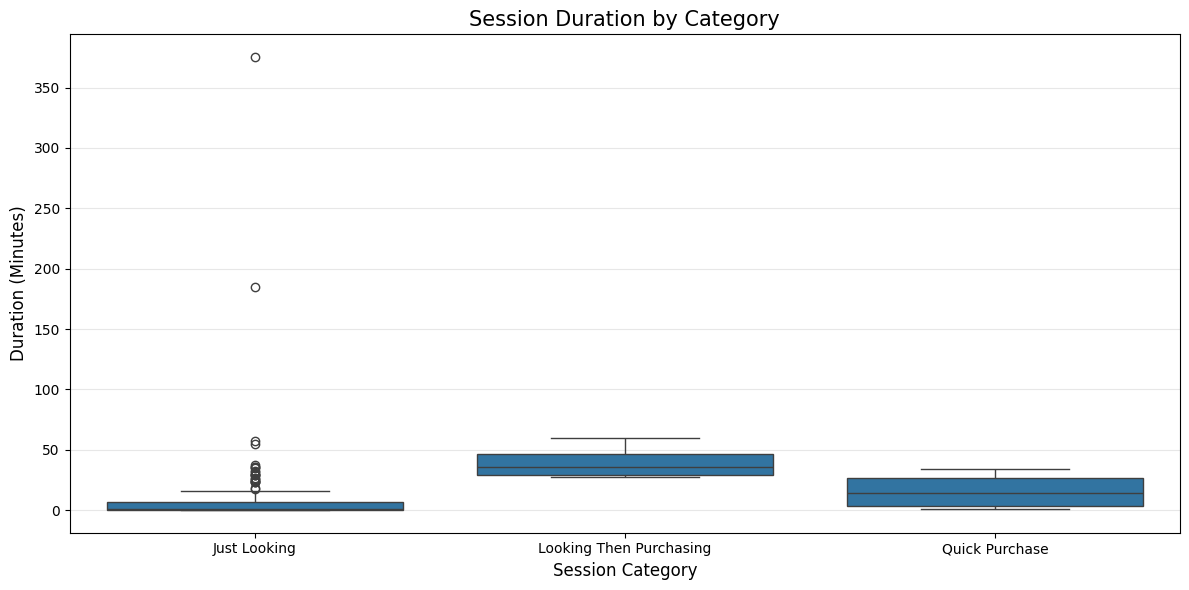

Session Duration Statistics by Category:


,Count,Average Duration (min),Median Duration (min),Min Duration (min),Max Duration (min)
category,,,,,
Just Looking,204,8.197012,0.964258,0.000000,375.404583
Looking Then Purchasing,4,39.707721,35.969067,27.120783,59.771967
Quick Purchase,10,15.172842,14.391867,1.207300,34.043683


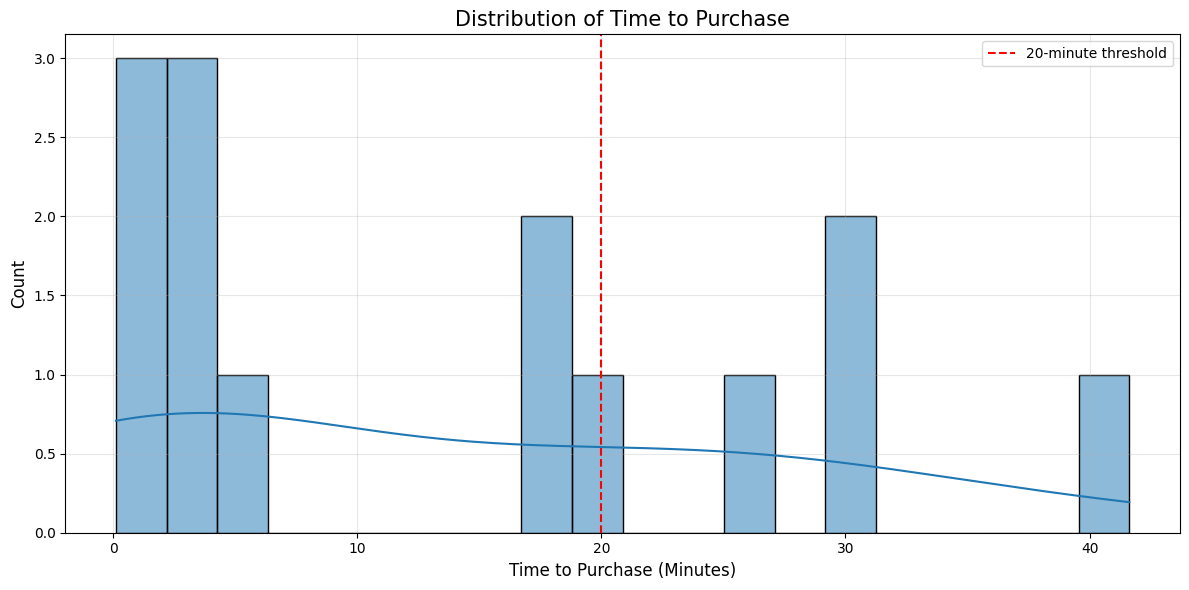

In [ ]:
# Let's analyze the duration distribution for each session category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='duration_minutes', data=sessions_df, order=['Just Looking', 'Looking Then Purchasing', 'Quick Purchase'])
plt.title('Session Duration by Category', fontsize=15)
plt.xlabel('Session Category', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate and display statistics about session duration by category
duration_stats = sessions_df.groupby('category')['duration_minutes'].agg(['count', 'mean', 'median', 'min', 'max'])
duration_stats = duration_stats.rename(columns={
    'count': 'Count',
    'mean': 'Average Duration (min)',
    'median': 'Median Duration (min)',
    'min': 'Min Duration (min)',
    'max': 'Max Duration (min)'
})

print("Session Duration Statistics by Category:")
display(duration_stats)

# For purchasing sessions, analyze the distribution of time to purchase
if len(sessions_df[sessions_df['has_purchase']]) > 0:
    plt.figure(figsize=(12, 6))
    
    # Create a histogram of time to purchase
    purchase_sessions = sessions_df[sessions_df['has_purchase']].copy()
    sns.histplot(data=purchase_sessions, x='time_to_purchase', bins=20, kde=True)
    
    # Add a vertical line at 20 minutes to show our categorization threshold
    plt.axvline(x=20, color='red', linestyle='--', label='20-minute threshold')
    
    plt.title('Distribution of Time to Purchase', fontsize=15)
    plt.xlabel('Time to Purchase (Minutes)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Let's explore if specific users tend to follow particular browsing patterns

# Count the number of sessions in each category per user
user_category_counts = sessions_df.groupby(['user_id', 'category']).size().unstack(fill_value=0)

# If some categories are missing, add them with zeros
for category in ['Just Looking', 'Looking Then Purchasing', 'Quick Purchase']:
    if category not in user_category_counts.columns:
        user_category_counts[category] = 0

# Calculate the total number of sessions per user
user_category_counts['Total Sessions'] = user_category_counts.sum(axis=1)

# Calculate the percentage of each category per user
user_category_percentages = user_category_counts.copy()
for category in ['Just Looking', 'Looking Then Purchasing', 'Quick Purchase']:
    user_category_percentages[f'{category} %'] = user_category_counts[category] / user_category_counts['Total Sessions'] * 100

# Sort by total sessions in descending order
user_category_counts = user_category_counts.sort_values('Total Sessions', ascending=False)

# Display the top 10 users by session count and their category distribution
print("Top 10 Users by Session Count and Their Category Distribution:")
display(user_category_counts.head(10))

# Identify users who primarily use one category (>75% of their sessions)
primarily_just_looking = user_category_percentages[user_category_percentages['Just Looking %'] > 75]
primarily_looking_then_purchasing = user_category_percentages[user_category_percentages['Looking Then Purchasing %'] > 75]
primarily_quick_purchase = user_category_percentages[user_category_percentages['Quick Purchase %'] > 75]

# Display counts of users with strong category preferences
print(f"\nUsers with strong category preferences (>75% of sessions):")
print(f"Primarily 'Just Looking': {len(primarily_just_looking)} users")
print(f"Primarily 'Looking Then Purchasing': {len(primarily_looking_then_purchasing)} users")
print(f"Primarily 'Quick Purchase': {len(primarily_quick_purchase)} users")

Top 10 Users by Session Count and Their Category Distribution:


category,Just Looking,Looking Then Purchasing,Quick Purchase,Total Sessions
user_id,,,,
390c0190-33a3-4029-ae09-687bff0b77d6,24,1,2,27
42a0286f-f933-490a-89aa-0c0037dae11e,24,0,1,25
ddb693bf-df31-4881-a0de-5cca527b0504,18,0,0,18
05d00887-5f39-4c88-8457-3da20a77b761,15,0,0,15
05d00887-5f39-4c88-8457-3da20a77b761,14,0,0,14
a584c10c-d236-408a-b544-50b6219dee39,14,0,0,14
c840702c-e454-47b5-8ef5-60ef2a7df99e,11,0,0,11
e2eb1291-5fec-45e6-bded-3018f0d67d66,7,0,3,10
0923b647-997c-466d-b7ce-3ae6246ce5d7,6,0,0,6



Users with strong category preferences (>75% of sessions):
Primarily 'Just Looking': 54 users
Primarily 'Looking Then Purchasing': 2 users
Primarily 'Quick Purchase': 1 users


## Session Categorization Summary

This analysis has allowed us to categorize shopping sessions into three distinct types based on user behavior:

1. **Just Looking** - Sessions without any purchase events. These represent users who are browsing, researching, or comparing products but not making a purchase during that session.

2. **Looking Then Purchasing** - Sessions where users spent at least 20 minutes browsing before making a purchase. This suggests a more deliberate decision-making process, where users are carefully considering options before committing to a purchase.

3. **Quick Purchase** - Sessions where users made a purchase within 20 minutes of starting their session. This may indicate impulse purchases, returning customers who already know what they want, or users with a clear purchase intention from the start.

The distribution and characteristics of these categories provide valuable insights into user shopping behavior patterns and can help inform strategies for improving user experience and conversion optimization.

## Extended Session Flow Categorization

Let's categorize sessions based on more detailed user flows:

1. **Just Looking** - Sessions without add-to-cart, checkout, or purchase events
2. **Add-to-Cart** - Sessions with add-to-cart but no checkout or purchase events
3. **Checkout** - Sessions with checkout events but no add-to-cart or purchase events
4. **Add-to-Cart then Checkout** - Sessions with both add-to-cart and checkout events, but no purchase
5. **Checkout then Purchase** - Sessions with checkout and purchase events, but no add-to-cart
6. **Complete Flow** - Sessions with add-to-cart, checkout, and purchase events

This will help us visualize the different user journey patterns.

In [ ]:
# Define the different event types we're interested in
event_types = {
    'add_to_cart': 'add-to-cart',
    'checkout': 'checkout',
    'purchase': 'enforce_wait_modal_shown'
}

# Create flags for each event type in the main dataframe
for event_key, event_value in event_types.items():
    df[f'is_{event_key}'] = df['type'] == event_value

# Verify our event detection in the raw dataframe
for event_key, event_value in event_types.items():
    count = df[f'is_{event_key}'].sum()
    print(f"Total {event_key} events detected in raw data: {count}")
    # Show a sample of each event type if available
    if count > 0:
        print(f"\nSample of {event_key} events:")
        display(df[df[f'is_{event_key}'] == True].head(2))
    print("\n" + "-"*50 + "\n")

# Now let's verify that we're counting each event type at most once per session
unique_session_events = {}
for event_key in event_types.keys():
    # Count sessions with at least one occurrence of this event type
    sessions_with_event = df.groupby('session_id')[f'is_{event_key}'].any().sum()
    unique_session_events[event_key] = sessions_with_event

print("Events counted uniquely per session:")
for event_key, count in unique_session_events.items():
    print(f"Sessions with at least one {event_key} event: {count}")
    
# Calculate and print the difference between raw counts and unique-per-session counts
print("\nDifference between raw counts and unique per session counts:")
for event_key in event_types.keys():
    raw_count = df[f'is_{event_key}'].sum()
    unique_count = unique_session_events[event_key]
    diff = raw_count - unique_count
    if diff > 0:
        print(f"{event_key}: {diff} duplicate events removed when counting uniquely per session")
    else:
        print(f"{event_key}: No duplicate events found across sessions")

Total add_to_cart events detected in raw data: 54

Sample of add_to_cart events:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain,is_purchase,timestamp,is_add_to_cart,is_checkout
459,19971,add-to-cart,www.amazon.com/gp/product/1108724264/ref=as_li_tl,NaN,a584c10c-d236-408a-b544-50b6219dee39,079d185e-50e7-46fc-9eef-7bbf97741197,2025-04-02T12:11:11.798597+00:00,2025-04-02T12:11:11.089+00:00,amazon.com,False,2025-04-02 12:11:11.089000+00:00,True,False
1027,20551,add-to-cart,www.bestbuy.com/site/apple-macbook-pro-14-inch...,NaN,053a8283-15f4-40be-af99-6ee270de0459,efd04950-71ea-4d15-a7a9-3052fc3519a1,2025-04-02T21:39:37.558524+00:00,2025-04-02T21:39:10.646+00:00,bestbuy.com,False,2025-04-02 21:39:10.646000+00:00,True,False



--------------------------------------------------

Total checkout events detected in raw data: 54

Sample of checkout events:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain,is_purchase,timestamp,is_add_to_cart,is_checkout
47,19547,checkout,foto.foetex.dk/checkout.html,NaN,390c0190-33a3-4029-ae09-687bff0b77d6,476b369f-eb28-4511-9e3c-595867fda6c6,2025-03-27T07:48:53.399341+00:00,2025-03-27T07:48:52.814+00:00,foetex.dk,False,2025-03-27 07:48:52.814000+00:00,False,True
148,19647,checkout,www.ticketmaster.dk/checkout/Z698xZC4Z1744-y/5...,NaN,0b7cd927-52ef-434b-8b2e-9c63281c6327,d80be840-c787-4f26-a287-19be28478014,2025-03-27T15:27:56.313968+00:00,2025-03-27T15:27:55.78+00:00,ticketmaster.dk,False,2025-03-27 15:27:55.780000+00:00,False,True



--------------------------------------------------

Total purchase events detected in raw data: 27

Sample of purchase events:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain,is_purchase,timestamp,is_add_to_cart,is_checkout
1649,21162,enforce_wait_modal_shown,secure6.store.apple.com/shop/checkout,"{""permitExists"":true,""permitIsValid"":false,""ti...",7e54f2ee-060a-467e-b319-9e99d8e58e27,66d24c9c-88d2-426b-b292-e44ca07eaf14,2025-04-04T02:32:09.560047+00:00,2025-04-04T02:32:08.936+00:00,apple.com,True,2025-04-04 02:32:08.936000+00:00,False,False
1731,21243,enforce_wait_modal_shown,shop.app/checkout/14159740/cn/Z2NwLXVzLWVhc3Qx...,"{""permitExists"":true,""permitIsValid"":false,""ti...",a8813899-eb7b-49f9-9e97-7f91f995e944,1eb181c8-adb1-432c-98bb-a30fed16f808,2025-04-04T14:36:21.698326+00:00,2025-04-04T14:36:21.283+00:00,shop.app,True,2025-04-04 14:36:21.283000+00:00,False,False



--------------------------------------------------

Events counted uniquely per session:
Sessions with at least one add_to_cart event: 22
Sessions with at least one checkout event: 39
Sessions with at least one purchase event: 14

Difference between raw counts and unique per session counts:
add_to_cart: 32 duplicate events removed when counting uniquely per session
checkout: 15 duplicate events removed when counting uniquely per session
purchase: 13 duplicate events removed when counting uniquely per session


In [ ]:
# Extract session data with flow information
flow_session_data = []
for session_id, session_df in session_groups:
    # Skip sessions with invalid or placeholder IDs
    if session_id == 'none' or pd.isna(session_id):
        continue
        
    # Sort session events by timestamp
    session_df = session_df.sort_values('timestamp')
    
    # Get user_id (assuming it's consistent within a session)
    user_id = session_df['user_id'].iloc[0] if not session_df.empty else None
    
    # Get session start and end times
    start_time = session_df['timestamp'].min()
    end_time = session_df['timestamp'].max()
    
    # Calculate session duration in minutes
    duration_minutes = (end_time - start_time).total_seconds() / 60
    
    # Check for each event type - ensuring uniqueness per session by using .any()
    # This guarantees that even if a user triggers the same event multiple times in a session,
    # we only count it once for categorization purposes
    has_add_to_cart = session_df['is_add_to_cart'].any()
    has_checkout = session_df['is_checkout'].any()
    has_purchase = session_df['is_purchase'].any()
    
    # Find timestamps for FIRST occurrence of each event type
    add_to_cart_time = session_df[session_df['is_add_to_cart']]['timestamp'].min() if has_add_to_cart else None
    checkout_time = session_df[session_df['is_checkout']]['timestamp'].min() if has_checkout else None
    purchase_time = session_df[session_df['is_purchase']]['timestamp'].min() if has_purchase else None
    
    # Determine event sequence order based on first occurrences
    event_order = []
    if has_add_to_cart:
        event_order.append(('add_to_cart', add_to_cart_time))
    if has_checkout:
        event_order.append(('checkout', checkout_time))
    if has_purchase:
        event_order.append(('purchase', purchase_time))
    
    # Sort events by timestamp
    event_order.sort(key=lambda x: x[1])
    
    # Extract the ordered sequence of event types
    event_sequence = [event[0] for event in event_order]
    event_sequence_str = ' → '.join(event_sequence) if event_sequence else 'no_events'
    
    # Count the occurrences of each event type in this session (for validation)
    add_to_cart_count = session_df['is_add_to_cart'].sum()
    checkout_count = session_df['is_checkout'].sum()
    purchase_count = session_df['is_purchase'].sum()
    
    # Collect relevant session details
    flow_session_data.append({
        'session_id': session_id,
        'user_id': user_id,
        'start_time': start_time,
        'end_time': end_time,
        'duration_minutes': duration_minutes,
        'has_add_to_cart': has_add_to_cart,
        'has_checkout': has_checkout,
        'has_purchase': has_purchase,
        'add_to_cart_count': add_to_cart_count,  # Raw count for validation
        'checkout_count': checkout_count,         # Raw count for validation
        'purchase_count': purchase_count,         # Raw count for validation
        'event_sequence': event_sequence_str,
        'event_count': len(session_df)
    })

# Create DataFrame from collected session data
flow_sessions_df = pd.DataFrame(flow_session_data)

# Check if we have any sessions with multiple occurrences of the same event type
print("Sessions with multiple occurrences of the same event type:")
print(f"Add-to-cart: {(flow_sessions_df['add_to_cart_count'] > 1).sum()} sessions")
print(f"Checkout: {(flow_sessions_df['checkout_count'] > 1).sum()} sessions")
print(f"Purchase: {(flow_sessions_df['purchase_count'] > 1).sum()} sessions")

# Display session counts by event sequence
print("\nSession counts by event sequence:")
display(flow_sessions_df['event_sequence'].value_counts())

# Display sample of the flow sessions dataframe
print("\nSample of flow sessions data:")
display(flow_sessions_df.head())

Sessions with multiple occurrences of the same event type:
Add-to-cart: 11 sessions
Checkout: 12 sessions
Purchase: 8 sessions

Session counts by event sequence:


event_sequence
no_events                            173
checkout                              19
add_to_cart → checkout → purchase      7
add_to_cart → checkout                 5
add_to_cart                            5
checkout → purchase                    4
checkout → add_to_cart → purchase      2
checkout → add_to_cart                 2
add_to_cart → purchase                 1
Name: count, dtype: int64


Sample of flow sessions data:


session_id                               user_id  \
0  018aa09c-8d23-4a7e-a75c-21844cfb7559  42a0286f-f933-490a-89aa-0c0037dae11e   
1  02f2c3fb-9467-4cfc-bbc3-8c40806c3f53  94707ac7-38e2-455b-82cd-c301e7da7eed   
2  05cf0dea-a517-47de-a840-83ee16313b56  130929be-2d14-41af-ad9f-9006a20f83e7   
3  063adb2f-601f-49c8-a7fe-3ff60a07df05  1790dc76-e30c-4520-b12a-dbf62998c65c   
4  079d185e-50e7-46fc-9eef-7bbf97741197  a584c10c-d236-408a-b544-50b6219dee39   

                        start_time                         end_time  \
0 2025-05-18 19:36:40.342000+00:00 2025-05-18 19:38:11.505000+00:00   
1 2025-05-20 02:59:26.509000+00:00 2025-05-20 02:59:27.494000+00:00   
2 2025-04-06 14:01:11.051000+00:00 2025-04-06 14:01:20.951000+00:00   
3 2025-03-27 12:10:35.809000+00:00 2025-03-27 12:10:42.863000+00:00   
4 2025-04-02 12:10:38.313000+00:00 2025-04-02 12:11:37.877000+00:00   

   duration_minutes  has_add_to_cart  has_checkout  has_purchase  \
0          1.519383            False         False         False   
1          0.016417            False         False         False   
2          0.165000            False         False         False   
3          0.117567            False         False         False   
4          0.992733             True          True         False   

   add_to_cart_count  checkout_count  purchase_count          event_sequence  \
0                  0               0               0               no_events   
1                  0               0               0               no_events   
2                  0               0               0               no_events   
3                  0               0               0               no_events   
4                  1               1               0  add_to_cart → checkout   

   event_count  
0           33  
1            2  
2            3  
3           10  
4           37

In [ ]:
# Define the flow categorization function
def categorize_flow(row):
    # Note: has_add_to_cart, has_checkout, and has_purchase are boolean flags
    # that indicate whether a session contains at least one occurrence of each event type.
    # They already handle uniqueness per session because they're created using .any()
    
    # Complete flow
    if row['has_add_to_cart'] and row['has_checkout'] and row['has_purchase']:
        return 'Complete Flow'
    
    # Add to cart then checkout
    elif row['has_add_to_cart'] and row['has_checkout'] and not row['has_purchase']:
        return 'Add-to-Cart then Checkout'
    
    # Checkout then purchase
    elif not row['has_add_to_cart'] and row['has_checkout'] and row['has_purchase']:
        return 'Checkout then Purchase'
    
    # Just add to cart
    elif row['has_add_to_cart'] and not row['has_checkout'] and not row['has_purchase']:
        return 'Add-to-Cart'
    
    # Just checkout
    elif not row['has_add_to_cart'] and row['has_checkout'] and not row['has_purchase']:
        return 'Checkout'
    
    # Just purchase (unusual but possible)
    elif not row['has_add_to_cart'] and not row['has_checkout'] and row['has_purchase']:
        return 'Direct Purchase'
    
    # Just looking
    else:
        return 'Just Looking'

# Apply the flow categorization
flow_sessions_df['flow_category'] = flow_sessions_df.apply(categorize_flow, axis=1)

# Count sessions by flow category
flow_category_counts = flow_sessions_df['flow_category'].value_counts()

# Calculate percentages
flow_category_percentages = flow_sessions_df['flow_category'].value_counts(normalize=True) * 100

# Create a DataFrame for easy viewing
flow_categories_df = pd.DataFrame({
    'Count': flow_category_counts,
    'Percentage': flow_category_percentages
})

print("Session Flow Categories (each session is counted exactly once):")
display(flow_categories_df)

Session Flow Categories (each session is counted exactly once):


,Count,Percentage
flow_category,,
Just Looking,174,79.816514
Checkout,19,8.715596
Complete Flow,9,4.128440
Add-to-Cart then Checkout,7,3.211009
Add-to-Cart,5,2.293578
Checkout then Purchase,4,1.834862


/var/folders/yv/xt28csc14lq6qntd89nbqmfm0000gn/T/ipykernel_44484/3106819084.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




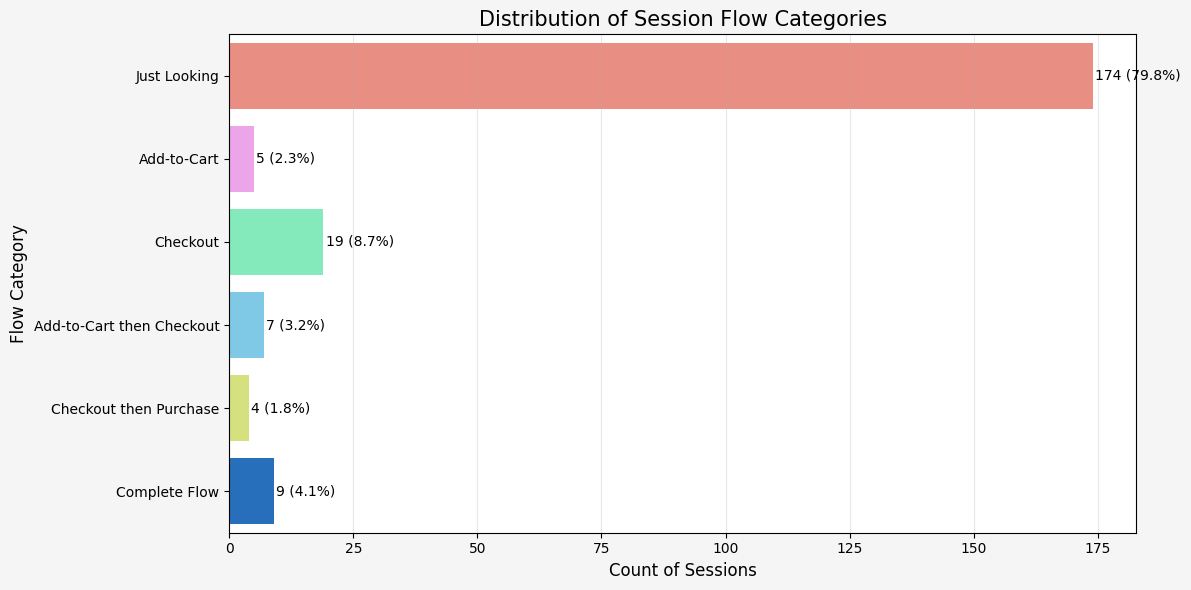

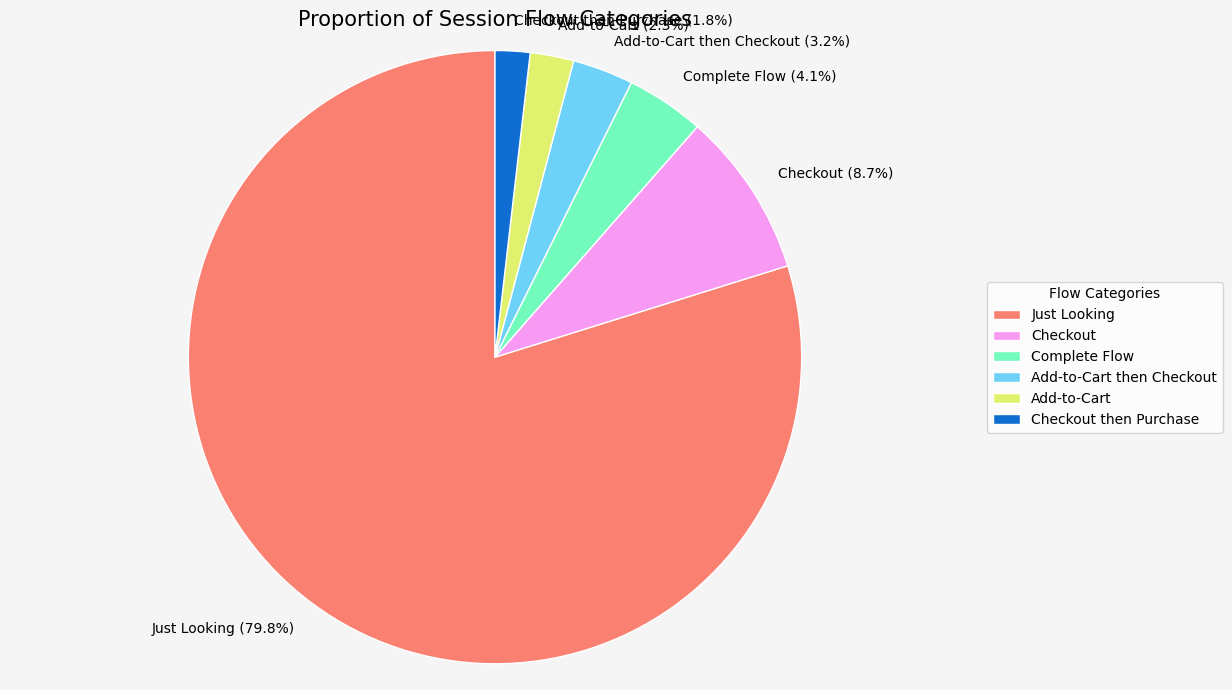

In [ ]:
# Define order of categories for consistent visualization
flow_order = [
    'Just Looking', 
    'Add-to-Cart', 
    'Checkout', 
    'Add-to-Cart then Checkout', 
    'Direct Purchase',
    'Checkout then Purchase', 
    'Complete Flow'
]

# Filter to only include categories that exist in our data
flow_order = [cat for cat in flow_order if cat in flow_category_counts.index]

# Visualize the distribution of flow categories
plt.figure(figsize=(12, 6), facecolor=facecolor)
sns.barplot(
    x=flow_category_counts.loc[flow_order].values, 
    y=flow_order, 
    palette=colors[:len(flow_order)],
    orient='h'
)
plt.title('Distribution of Session Flow Categories', fontsize=15)
plt.xlabel('Count of Sessions', fontsize=12)
plt.ylabel('Flow Category', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Add count and percentage annotations to each bar
for i, (count, percent) in enumerate(zip(flow_category_counts.loc[flow_order], flow_category_percentages.loc[flow_order])):
    plt.text(count + 0.5, i, f"{count} ({percent:.1f}%)", va='center')

plt.tight_layout()
plt.show()

# Create a pie chart to visualize the proportion of each flow category
plt.figure(figsize=(10, 7), facecolor=facecolor)
plt.pie(
    flow_category_counts,
    labels=[f"{idx} ({val:.1f}%)" for idx, val in zip(flow_category_counts.index, flow_category_percentages)],
    autopct='',
    startangle=90,
    colors=colors[:len(flow_category_counts)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Proportion of Session Flow Categories', fontsize=15)
plt.tight_layout()
plt.legend(flow_category_counts.index, title="Flow Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
# Create a Sankey diagram to visualize flow sequences
try:
    import plotly.graph_objects as go
    import networkx as nx
    
    # Create a directed graph of event sequences
    G = nx.DiGraph()
    
    # Add the entry point
    G.add_node('Session Start')
    
    # Count transitions between events for sessions with events
    transitions = {}
    total_sessions = len(flow_sessions_df)
    
    # Get unique event sequences
    sequences = flow_sessions_df[flow_sessions_df['event_sequence'] != 'no_events']['event_sequence'].unique()
    
    for seq in sequences:
        events = seq.split(' → ')
        count = len(flow_sessions_df[flow_sessions_df['event_sequence'] == seq])
        
        # Add entry point transition
        source = 'Session Start'
        target = events[0]
        key = (source, target)
        transitions[key] = transitions.get(key, 0) + count
        
        # Add transitions between events
        for i in range(len(events) - 1):
            source = events[i]
            target = events[i + 1]
            key = (source, target)
            transitions[key] = transitions.get(key, 0) + count
        
        # Add exit transition
        source = events[-1]
        target = 'Session End'
        key = (source, target)
        transitions[key] = transitions.get(key, 0) + count
    
    # Handle sessions with no events
    no_events_count = len(flow_sessions_df[flow_sessions_df['event_sequence'] == 'no_events'])
    if no_events_count > 0:
        transitions[('Session Start', 'Session End')] = no_events_count
    
    # Add nodes and edges to the graph
    for (source, target), weight in transitions.items():
        if source not in G:
            G.add_node(source)
        if target not in G:
            G.add_node(target)
        G.add_edge(source, target, weight=weight)
    
    # Get unique nodes for Sankey diagram
    nodes = list(G.nodes())
    node_indices = {node: i for i, node in enumerate(nodes)}
    
    # Create the Sankey diagram data
    links = [
        dict(
            source=node_indices[source],
            target=node_indices[target],
            value=G[source][target]['weight'],
            label=f"{G[source][target]['weight']} sessions"
        )
        for source, target in G.edges()
    ]
    
    # Define nice labels and colors
    label_map = {
        'add_to_cart': 'Add to Cart',
        'checkout': 'Checkout',
        'purchase': 'Purchase',
        'Session Start': 'Session Start',
        'Session End': 'Session End'
    }
    
    node_labels = [label_map.get(node, node) for node in nodes]
    
    # Define colors
    node_colors = {}
    node_colors['Session Start'] = colors[0]
    node_colors['Session End'] = colors[1]
    node_colors['add_to_cart'] = colors[2]
    node_colors['checkout'] = colors[3]
    node_colors['purchase'] = colors[4]
    
    # Create the Sankey diagram with improved spacing and clarity
    fig = go.Figure(data=[
        go.Sankey(
            node=dict(
                # Increase padding between nodes for better separation
                pad=25,
                # Increase thickness of nodes for better visibility
                thickness=30,
                # Add border to nodes for better definition
                line=dict(color='black', width=1.0),
                label=node_labels,
                color=[node_colors.get(node, colors[5]) for node in nodes]
            ),
            link=dict(
                source=[link['source'] for link in links],
                target=[link['target'] for link in links],
                value=[link['value'] for link in links],
                label=[link['label'] for link in links],
                # Customize link appearance
                color='rgba(100,100,100,0.2)',  # Slight gray tint for links
                hovertemplate='<b>%{value} sessions</b><br>%{source.label} → %{target.label}',
                # Increase link line width minimums for better visibility
                line=dict(width=0.5)
            ),
            # Arrange nodes in specific positions
            arrangement='snap'
        )
    ])
    
    fig.update_layout(
        title_text=f"User Flow Sankey Diagram (Total: {total_sessions} sessions)",
        title_font=dict(size=18),
        font=dict(size=14),
        paper_bgcolor=facecolor,
        plot_bgcolor=facecolor,
        # Increase height for better spacing
        height=600,
        # Increase width for better readability
        width=1000,
        margin=dict(l=25, r=25, t=50, b=25)
    )
    
    fig.show()
    
except ImportError as e:
    print(f"Could not create Sankey diagram: {e}")
    print("To create a Sankey diagram, install plotly and networkx:")
    print("pip install plotly networkx")

/var/folders/yv/xt28csc14lq6qntd89nbqmfm0000gn/T/ipykernel_44484/3718921765.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




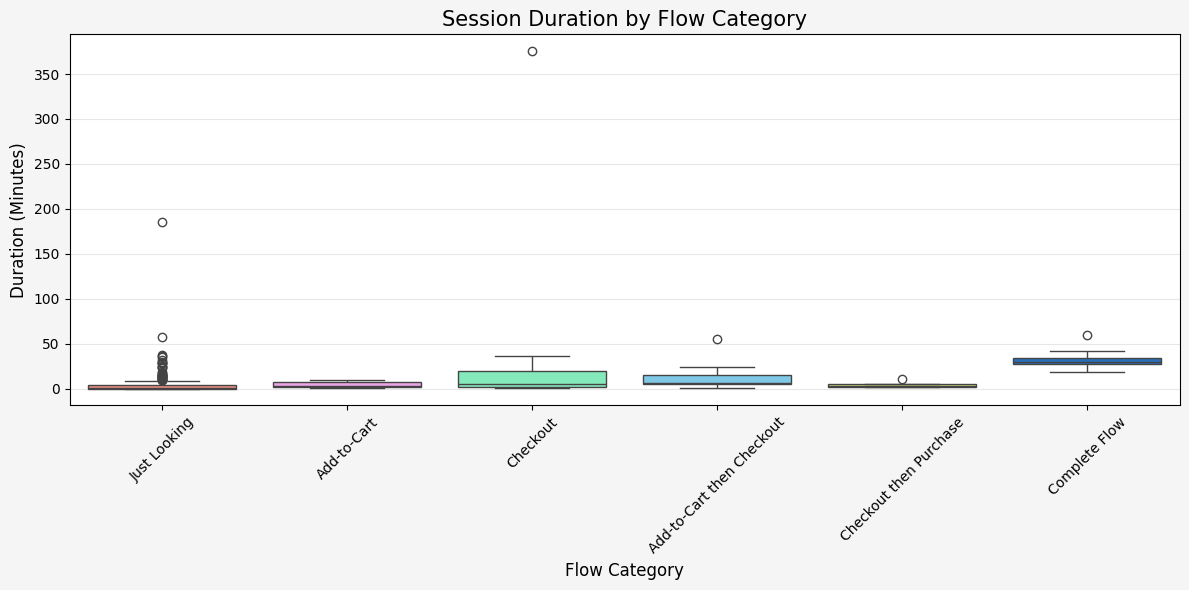

Session Duration Statistics by Flow Category:


,Count,Average Duration (min),Median Duration (min),Min Duration (min),Max Duration (min)
flow_category,,,,,
Just Looking,174,5.703835,0.504733,0.000000,185.059683
Add-to-Cart,5,4.335033,2.650967,0.255867,9.167567
Checkout,19,29.444055,4.788217,0.079983,375.404583
Add-to-Cart then Checkout,7,14.541214,5.846433,0.992733,54.997483
Checkout then Purchase,4,4.404408,2.834300,1.207300,10.741733
Complete Flow,9,32.196006,29.254617,18.042000,59.771967



Analyzing time between events in the user journey...
Statistics for time between events (minutes):


add_to_cart_to_checkout  checkout_to_purchase  add_to_cart_to_purchase
count                16.000000             13.000000                10.000000
mean                  0.937134              6.711473                11.969453
50%                   0.028917              3.328767                10.957817
min                 -21.240683              0.117283                 0.267900
max                  22.318867             25.723917                27.851717

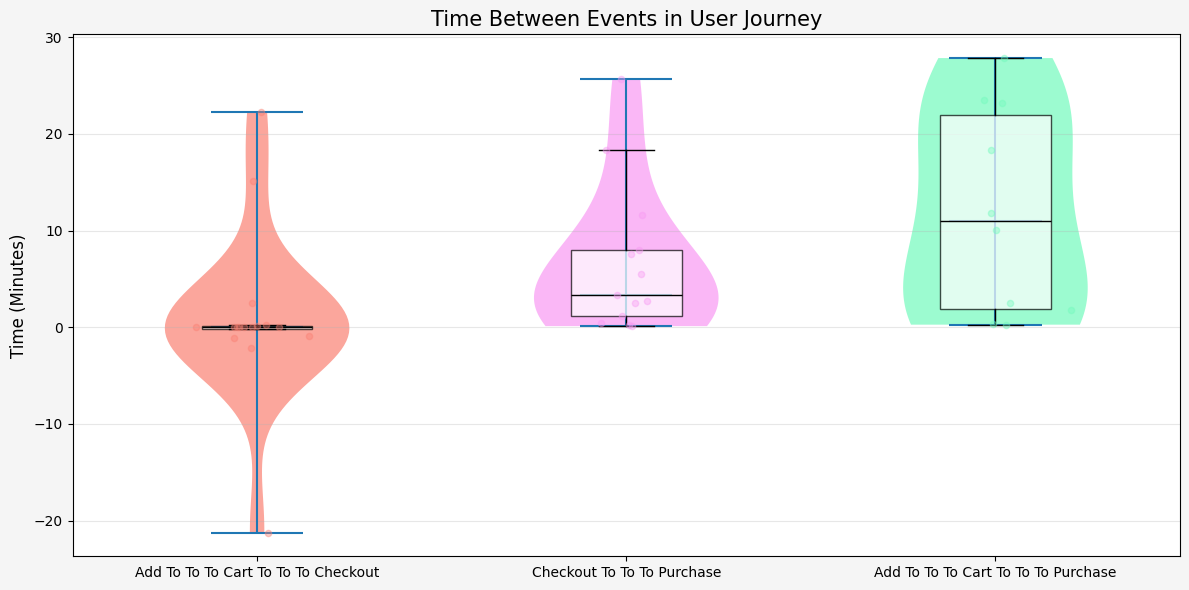

In [ ]:
# Analyze the relationship between flow category and session duration
plt.figure(figsize=(12, 6), facecolor=facecolor)
sns.boxplot(
    x='flow_category', 
    y='duration_minutes', 
    data=flow_sessions_df,
    order=flow_order,
    palette=colors[:len(flow_order)]
)
plt.title('Session Duration by Flow Category', fontsize=15)
plt.xlabel('Flow Category', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate and display statistics about session duration by flow category
flow_duration_stats = flow_sessions_df.groupby('flow_category')['duration_minutes'].agg(['count', 'mean', 'median', 'min', 'max'])
flow_duration_stats = flow_duration_stats.rename(columns={
    'count': 'Count',
    'mean': 'Average Duration (min)',
    'median': 'Median Duration (min)',
    'min': 'Min Duration (min)',
    'max': 'Max Duration (min)'
})

# Reorder to match our visualization order
flow_duration_stats = flow_duration_stats.reindex(flow_order)

print("Session Duration Statistics by Flow Category:")
display(flow_duration_stats)

# Create a heatmap of median times between events for sessions with multiple events
print("\nAnalyzing time between events in the user journey...")

# Extract sessions with at least 2 events
multi_event_sessions = flow_sessions_df[flow_sessions_df['event_sequence'].str.contains('→')]

if len(multi_event_sessions) > 0:
    # Function to calculate time differences between events
    def calc_event_times(session_id):
        session_events = df[df['session_id'] == session_id].sort_values('timestamp')
        
        # Get timestamps for each event type
        add_to_cart_time = session_events[session_events['is_add_to_cart']]['timestamp'].min() if session_events['is_add_to_cart'].any() else None
        checkout_time = session_events[session_events['is_checkout']]['timestamp'].min() if session_events['is_checkout'].any() else None
        purchase_time = session_events[session_events['is_purchase']]['timestamp'].min() if session_events['is_purchase'].any() else None
        
        # Calculate time differences in minutes
        times = {}
        if add_to_cart_time is not None and checkout_time is not None:
            times['add_to_cart_to_checkout'] = (checkout_time - add_to_cart_time).total_seconds() / 60
        if checkout_time is not None and purchase_time is not None:
            times['checkout_to_purchase'] = (purchase_time - checkout_time).total_seconds() / 60
        if add_to_cart_time is not None and purchase_time is not None:
            times['add_to_cart_to_purchase'] = (purchase_time - add_to_cart_time).total_seconds() / 60
        
        return times
    
    # Calculate time differences for all multi-event sessions
    time_diffs = []
    for session_id in multi_event_sessions['session_id']:
        times = calc_event_times(session_id)
        if times:
            times['session_id'] = session_id
            time_diffs.append(times)
    
    # Create DataFrame of time differences
    if time_diffs:
        time_diffs_df = pd.DataFrame(time_diffs)
        
        # Display statistics about time between events
        time_cols = [col for col in time_diffs_df.columns if col != 'session_id']
        if time_cols:
            time_stats = time_diffs_df[time_cols].describe()
            print("Statistics for time between events (minutes):")
            display(time_stats.loc[['count', 'mean', '50%', 'min', 'max']])
            
            # Create a combined visualization of time between events
            plt.figure(figsize=(12, 6), facecolor=facecolor)
            pos = range(len(time_cols))
            
            # Plot violin plots
            parts = plt.violinplot(
                [time_diffs_df[col].dropna() for col in time_cols],
                positions=pos,
                showmeans=False,
                showmedians=True
            )
            
            # Customize violin plot colors
            for i, pc in enumerate(parts['bodies']):
                pc.set_facecolor(colors[i])
                pc.set_alpha(0.7)
            
            # Add boxplot inside violins
            plt.boxplot(
                [time_diffs_df[col].dropna() for col in time_cols],
                positions=pos,
                widths=0.3,
                patch_artist=True,
                boxprops=dict(facecolor='white', alpha=0.7),
                medianprops=dict(color='black'),
                showfliers=False
            )
            
            # Add jittered points for better visualization
            for i, col in enumerate(time_cols):
                if len(time_diffs_df[col].dropna()) > 0:
                    # Add jitter to x-position
                    jitter = np.random.normal(0, 0.05, size=len(time_diffs_df[col].dropna()))
                    plt.scatter(i + jitter, time_diffs_df[col].dropna(), 
                                alpha=0.4, s=20, color=colors[i], zorder=3)
            
            # Customize the plot
            plt.xticks(pos, [col.replace('_', ' to ').title() for col in time_cols])
            plt.ylabel('Time (Minutes)', fontsize=12)
            plt.title('Time Between Events in User Journey', fontsize=15)
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()
else:
    print("No sessions with multiple events found.")

## Extended Flow Analysis Summary

This extended analysis of user flows provides deeper insights into customer behavior patterns:

1. **Conversion Funnel Visualization**: The Sankey diagram illustrates how users progress through the shopping journey, showing where users drop off and which paths are most common.

2. **Flow Categories**: By categorizing sessions into distinct flow patterns (Just Looking, Add-to-Cart, Checkout, etc.), we can understand the prevalence of different shopping behaviors.

3. **Duration Analysis**: The relationship between flow category and session duration reveals how time spent correlates with different user journeys.

4. **Time Between Events**: For sessions with multiple events, we've analyzed how much time typically passes between key actions like adding to cart and proceeding to checkout.

These insights can inform optimization strategies:

- For users who add items to cart but don't checkout, consider cart abandonment strategies
- For long durations between checkout and purchase, evaluate if the wait timer is causing friction
- For sessions with direct purchase events, understand if these are impulse purchases

Further analysis could explore how these flow patterns differ across different user segments or product categories.